In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hosts_iguais = False
token_bucket = True
if hosts_iguais:
    sufixo = '_iguais'
else:
    sufixo = '_diferentes'
if token_bucket:
    sufixoRL = '_comRL'
    subtitulo = 'Usando TokenBucket'
else:
    sufixoRL = '_semRL'
    subtitulo = 'Nao usando TokenBucket'
#df = pd.read_table ("resultados"+sufixo+".txt", sep='\s+', index_col = [1, 0])
df = pd.read_table ("resultados-hosts-15.txt", sep='\s+', index_col = [1, 0])


In [3]:
df

TxpacSlice1  RxpacSlice1  dropSlice1  TxpacSlice2  RxpacSlice2  \
RNG numHosts                                                                   
1   20-80         1940269      1940269           0      6082163      6074524   
    40-160        4102367      4101610         757      7102354      7075081   
    80-320        5805615      5799565        6050      7536637      7471814   
    120-480       7043284      7026991       16293      7603697      7508068   
    160-640       7252418      7223814       28604      7647953      7522137   
    200-800       7460785      7419688       41097      7690480      7531150   
    240-960       7483662      7438140       45522      7721622      7529845   
2   20-80         2200210      2200210           0      6476314      6466201   
    40-160        3793755      3792952         803      7118547      7091830   
    80-320        6291172      6283477        7695      7555845      7487024   
    120-480       6890609      6871613       18996      7620479      7522986   
    160-640       7239484      7211704       27780      7649941      7522940   
    200-800       7378452      7339527       38925      7690017      7529123   
    240-960       7518344      7472046       46298      7723909      7532793   
3   20-80         1914279      1914279           0      6468953      6462704   
    40-160        3444327      3443860         467      7171548      7140421   
    80-320        5849543      5842966        6577      7560289      7493675   
    120-480       7199134      7181298       17836      7616272      7517919   
    160-640       7265266      7233739       31527      7650548      7522498   
    200-800       7419253      7379984       39269      7691076      7531020   
    240-960       7410423      7367270       43153      7722116      7537553   
4   20-80         2052928      2052928           0      6353990      6345127   
    40-160        3318677      3318662          15      7229796      7201701   
    80-320        6012171      6003931        8240      7535515      7468517   
    120-480       6999781      6980507       19274      7614531      7518535   
    160-640       7329368      7302168       27200      7659818      7526356   
    200-800       7467794      7428507       39287      7685203      7528703   
    240-960       7486350      7437945       48405      7725369      7538440   

              dropSlice2  
RNG numHosts              
1   20-80           7639  
    40-160         27273  
    80-320         64823  
    120-480        95629  
    160-640       125816  
    200-800       159330  
    240-960       191772  
2   20-80          10113  
    40-160         26717  
    80-320         68821  
    120-480        97493  
    160-640       126998  
    200-800       160894  
    240-960       191116  
3   20-80           6249  
    40-160         31127  
    80-320         66614  
    120-480        98353  
    160-640       128050  
    200-800       160056  
    240-960       184563  
4   20-80           8863  
    40-160         28095  
    80-320         66998  
    120-480        95996  
    160-640       133461  
    200-800       156492  
    240-960       186929

In [4]:
df["%dropTotalS1"] = df.apply (lambda row: 100 * (float)(row["dropSlice1"]) / (row["TxpacSlice1"]+row["TxpacSlice2"]), axis=1)
df["%dropTotalS2"] = df.apply (lambda row: 100 * (float)(row["dropSlice2"]) / (row["TxpacSlice1"]+row["TxpacSlice2"]), axis=1)
#df
df["%dropS1"] = df.apply (lambda row: 100 * (float)(row["dropSlice1"]) / (row["TxpacSlice1"]), axis=1)
df["%dropS2"] = df.apply (lambda row: 100 * (float)(row["dropSlice2"]) / (row["TxpacSlice2"]), axis=1)

In [5]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

In [6]:
if hosts_iguais:
    df = df.query("numHosts != '50-50'")
else:
    #df = df.query("numHosts != '33-67'" or "numHosts != '67-33'" or "numHosts != '20-80'")
    df = df.query("numHosts != '20-80'")
gpb = df.groupby (["numHosts"])

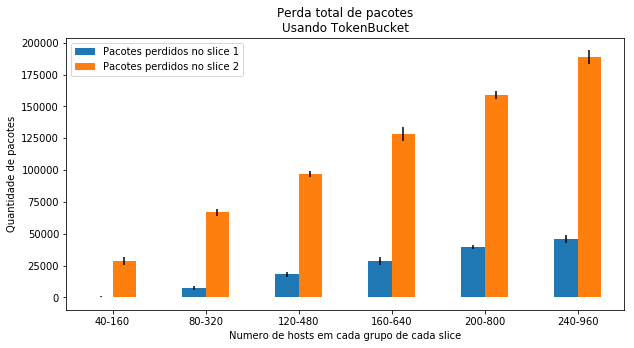

In [7]:
media = gpb.mean()
err = gpb.aggregate(confinterval)
err = err.filter(items=['dropSlice1', 'dropSlice2'])
media = media.filter(items=['dropSlice1', 'dropSlice2'])
#display (media)
#display (err)

media.sort_values(by=["dropSlice1"]).plot (kind='bar', yerr=err, title="Perda total de pacotes\n"+subtitulo, rot=360, figsize=(10,5))
plt.xlabel('Numero de hosts em cada grupo de cada slice')
plt.ylabel('Quantidade de pacotes')
plt.gca().legend(('Pacotes perdidos no slice 1','Pacotes perdidos no slice 2'))
plt.savefig('grafico_hosts'+sufixo+sufixoRL+'.pdf')

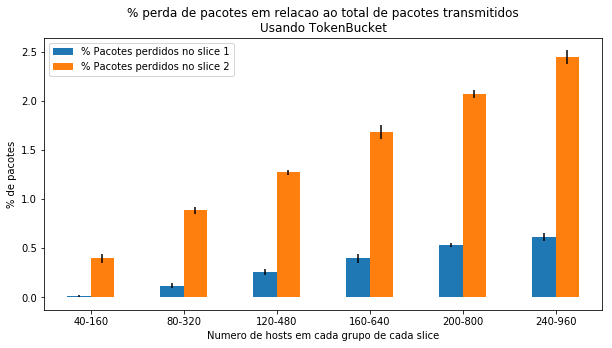

In [8]:
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['%dropS1', '%dropS2'])
media = media.filter(items=['%dropS1', '%dropS2'])

media.sort_values(by=["%dropS1"]).plot (kind='bar', yerr=err, title="% perda de pacotes em relacao ao total de pacotes transmitidos\n"+subtitulo , rot=360, figsize=(10,5))
plt.xlabel('Numero de hosts em cada grupo de cada slice')
plt.ylabel('% de pacotes')
plt.gca().legend(('% Pacotes perdidos no slice 1','% Pacotes perdidos no slice 2'))
plt.savefig('grafico_hosts'+sufixo+sufixoRL+'_porcentagem.pdf')

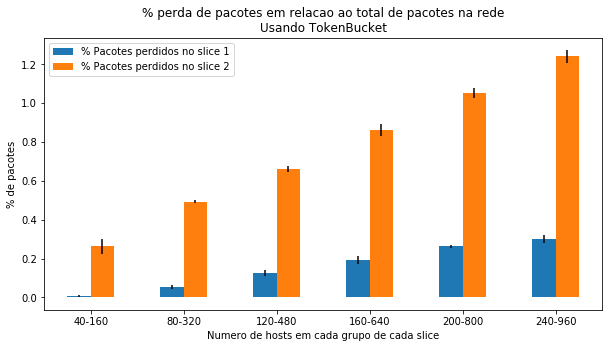

In [9]:
#Grafico em relação ao total
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['%dropTotalS1', '%dropTotalS2'])
media = media.filter(items=['%dropTotalS1', '%dropTotalS2'])

media.sort_values(by=["%dropTotalS1"]).plot (kind='bar', yerr=err, title="% perda de pacotes em relacao ao total de pacotes na rede\n"+subtitulo, rot=360, figsize=(10,5))
plt.xlabel('Numero de hosts em cada grupo de cada slice')
plt.ylabel('% de pacotes')
plt.gca().legend(('% Pacotes perdidos no slice 1','% Pacotes perdidos no slice 2'))
plt.savefig('grafico_hosts'+sufixo+sufixoRL+'_porcentagemTotal.pdf')

In [10]:
#Graficos para cada RNG

#lista_rng = ['1', '2','3','4']
#for i in lista_rng:
#    g=df[df.index.get_level_values('RNG').isin([i])].filter(items=['dropSlice1', 'dropSlice2'])
#    g.plot.bar(figsize=(20,10),title="Perda de pacotes, RNG = " + i, logy=True)

In [11]:
#Graficos para cada numero de host

#lista_host = ['100-100','200-200','300-300','400-400','500-500','600-600']
#for i in lista_host:
#    g=df[df.index.get_level_values('numHosts').isin([i])].filter(items=['dropSlice1', 'dropSlice2'])
#    g.plot.bar(figsize=(20,10),title="Perda de pacotes, hosts = " + i)